In [1]:
!python --version
!pip freeze | grep numpy
!pip freeze | grep matplotlib
!pip freeze | grep qiskit

Python 3.7.4
numpy==1.18.1
matplotlib==3.1.2
qiskit==0.18.0
qiskit-aer==0.5.0
qiskit-aqua==0.6.5
qiskit-ibmq-provider==0.6.0
qiskit-ignis==0.3.0
qiskit-terra==0.13.0


In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
from functools import partial
from phase_estimation import phase_estimation, U_function

### Phase Estimation Overview

**Input**: $U$, a Unitary matrix such that $ U| \psi\rangle = e^{2\pi i\theta}|\psi\rangle$<br>
**Output**: $\theta$, the phase of $U$

Quantum Phase Estimation is performed with a type of quantum circuit that takes a Unitary matrix $U$, applies it as as several Controlled Unitaries into the quantum circuit followed by an inverse Quantum Fourier Transform, and then measures an output that can be used to estimate the phase $\theta$ of the matrix $U$. The phase $\theta$ is estimated from the output value with the maximum probability like so, where $k$ is the number of qubits not including $\psi$:

$$ \mathrm{estimated}\:\theta = \dfrac{\mathrm{output}}{2^{\mathrm{k}}}$$

A generic Controlled Unitary operating on two qubits would take the following form:

\begin{split}C(U) =
    \begin{pmatrix}
        1 & 0 & 0 & 0 \\
        0 & 1 & 0 & 0 \\
        0 & 0 & u_{00} & u_{01} \\
        0 & 0 & u_{10} & u_{11}
    \end{pmatrix}\end{split}

In *phase_estimation.py*, the function `U_function` implements a simplified Controlled Unitary with a given angle $\lambda$, as shown below:

\begin{split}CU1 =
    |0\rangle\langle 0| \otimes I + |1\rangle\langle 1| \otimes U1 =
    \begin{pmatrix}
        1 & 0 & 0 & 0 \\
        0 & 1 & 0 & 0 \\
        0 & 0 & 1 & 0 \\
        0 & 0 & 0 & e^{i\lambda}
    \end{pmatrix}\end{split}

This was done to illustrate the effectiveness of the `phase_estimation` function, as the phase of this given Unitary is already known to be $\theta = \dfrac{\lambda}{2\pi}$

Feel free to modify `U_function` in *phase_estimation.py* to implement a different Controlled Unitary with an unknown phase $\theta$ (and an unknown $\lambda$).

### Code

For a unitary $U$ with phase $\theta$ = 1/4, a circuit as small as 2 qubits plus $\psi$ will do

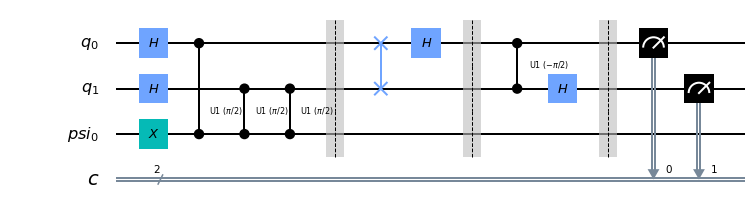

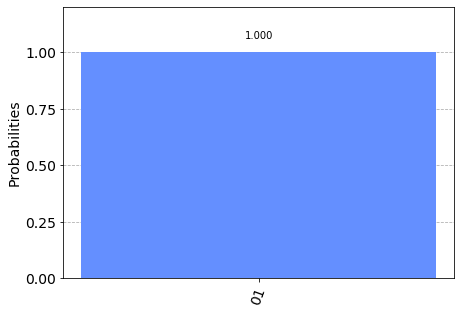

Highest Count Value:  0b1  =  1
Estimated theta: 1/2^2 =  0.25


In [3]:
theta = 1/4
bits = 2 # (not including ψ)

# Create a Controlled Unitary function with phase theta
U = partial(U_function, 2*np.pi*theta)

# Note that this is equivalent to:
def U(circuit, control, target):
    return U_function(2*np.pi*theta, circuit, control, target)

# U_function() can be modified to create a Controlled Unitary with an unknown phase
# and phase_estimation() will still work

est_theta, circuit = phase_estimation(U=U, bits=bits, show=True)

However, such a circuit does not have enough bits to estimate the phase of a Unitary with $\theta$ = 1/3

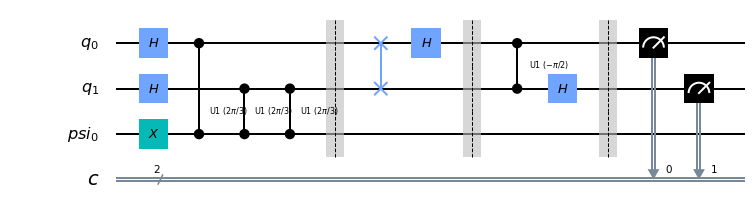

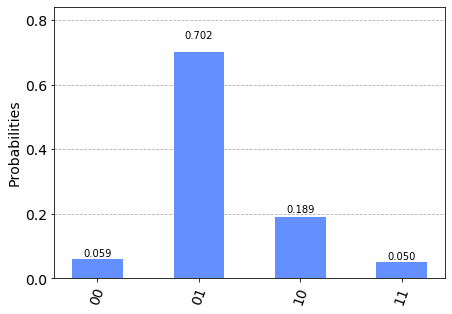

Highest Count Value:  0b1  =  1
Estimated theta: 1/2^2 =  0.25


(0.25, 0.3333333333333333)

In [4]:
theta = 1/3
bits = 2 # (not including ψ)

# Create a Controlled Unitary function with phase theta
U = partial(U_function, 2*np.pi*theta)

est_theta, circuit = phase_estimation(U=U, bits=bits, show=True)

est_theta, theta

Increasing the number of bits improves the precision of the estimated $\theta$

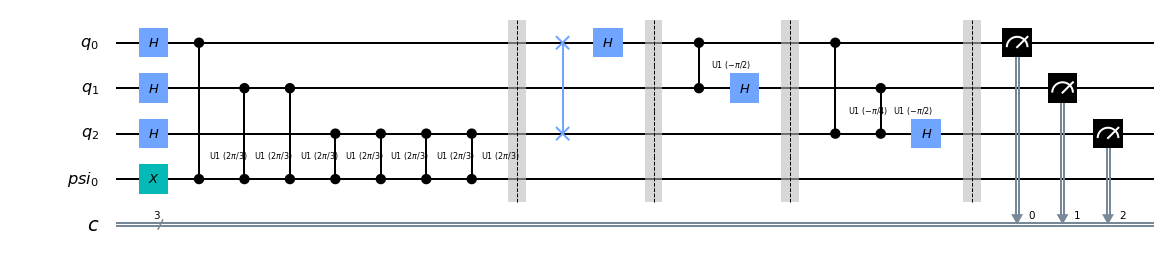

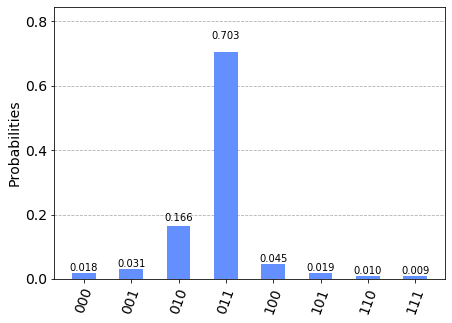

Highest Count Value:  0b11  =  3
Estimated theta: 3/2^3 =  0.375


(0.375, 0.3333333333333333)

In [5]:
theta = 1/3
bits = 3 # (not including ψ)

# Create a Controlled Unitary function with phase theta
U = partial(U_function, 2*np.pi*theta)

est_theta, circuit = phase_estimation(U=U, bits=bits, show=True)

est_theta, theta

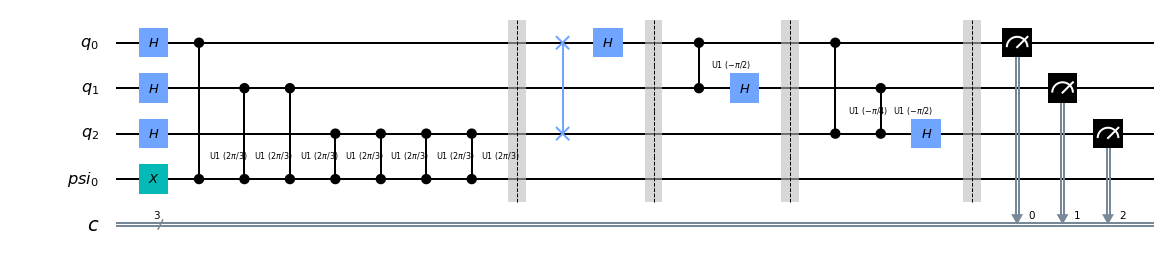

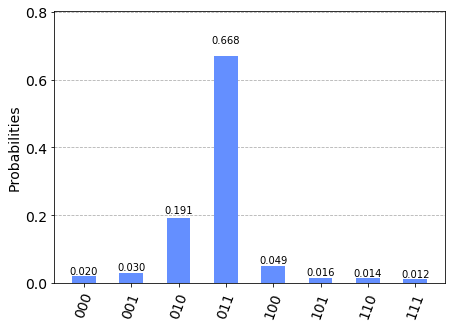

Highest Count Value:  0b11  =  3
Estimated theta: 3/2^3 =  0.375


In [6]:
theta = 1/3
bits = 3 # (not including ψ)

# Create a Controlled Unitary function with phase theta
U = partial(U_function, 2*np.pi*theta)

estimated_theta, circuit = phase_estimation(U=U, bits=bits, show=True)

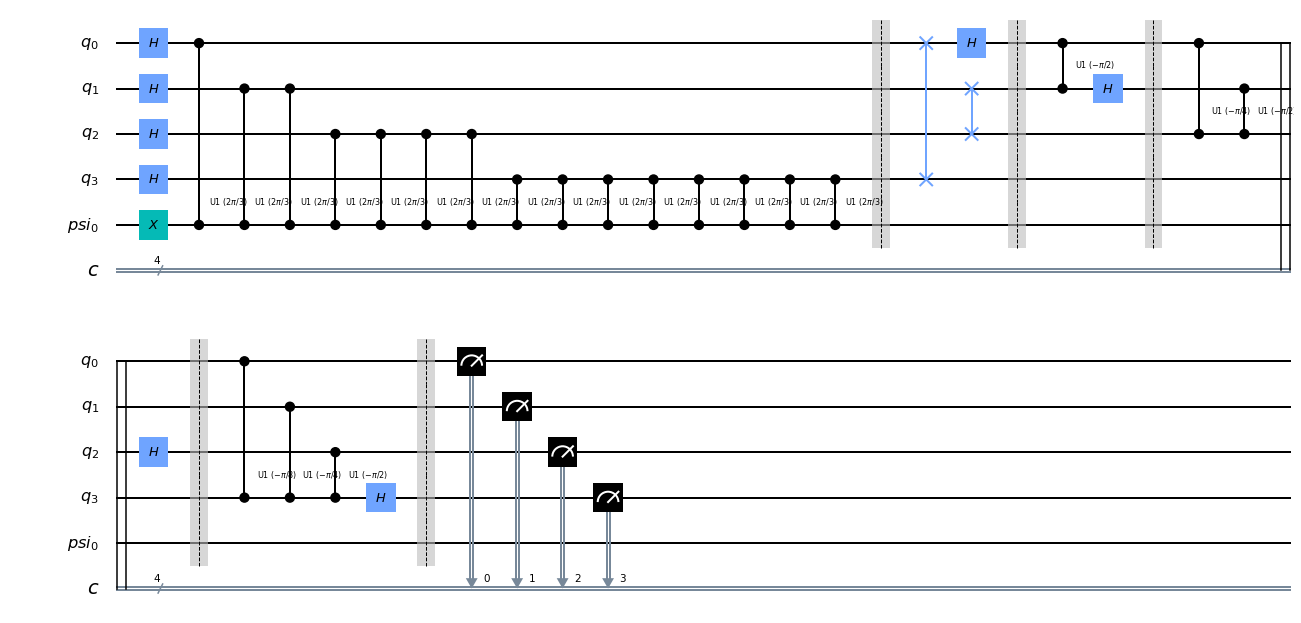

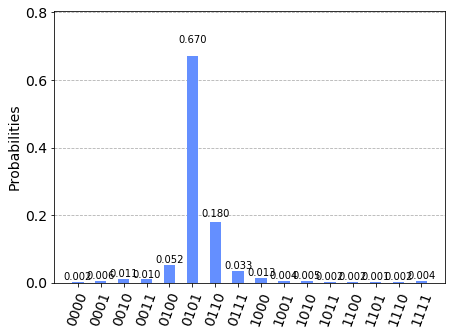

Highest Count Value:  0b101  =  5
Estimated theta: 5/2^4 =  0.3125


In [7]:
theta = 1/3
bits = 4 # (not including ψ)

# Create a Controlled Unitary function with phase theta
U = partial(U_function, 2*np.pi*theta)

est_theta, circuit = phase_estimation(U=U, bits=bits, show=True)

In [8]:
for bits in range(4,15):
    est_theta, circuit = phase_estimation(U=U, bits=bits, show=False)

    print(f"bits: {bits}, actual: {theta}, estimated: {est_theta}")

bits: 4, actual: 0.3333333333333333, estimated: 0.3125
bits: 5, actual: 0.3333333333333333, estimated: 0.34375
bits: 6, actual: 0.3333333333333333, estimated: 0.328125
bits: 7, actual: 0.3333333333333333, estimated: 0.3359375
bits: 8, actual: 0.3333333333333333, estimated: 0.33203125
bits: 9, actual: 0.3333333333333333, estimated: 0.333984375
bits: 10, actual: 0.3333333333333333, estimated: 0.3330078125
bits: 11, actual: 0.3333333333333333, estimated: 0.33349609375
bits: 12, actual: 0.3333333333333333, estimated: 0.333251953125
bits: 13, actual: 0.3333333333333333, estimated: 0.3333740234375
bits: 14, actual: 0.3333333333333333, estimated: 0.33331298828125


However, building a larger circuit in reality may not be as feasible.

**Another Example**

In [9]:
def calc_error(actual, estimated):
    return abs(actual - estimated)

In [10]:
# An example using a unitary U with phase θ = 1/7

theta = 1/7
bits = 8 # (not including ψ)

# Create a Controlled Unitary function with phase theta
U = partial(U_function, 2*np.pi*theta)

est_theta, circuit = phase_estimation(U=U, bits=bits, show=False)

print("estimated: ", est_theta, "actual:", theta)

est_theta, circuit

estimated:  0.14453125 actual: 0.14285714285714285


(0.14453125, <qiskit.circuit.quantumcircuit.QuantumCircuit at 0x7ff0724f0610>)

In [11]:
calc_error(theta, est_theta)

0.0016741071428571508

In [12]:
theta = 1/7

# Create a Controlled Unitary function with phase theta
U = partial(U_function, 2*np.pi*theta)

for bits in range(4,15):
    est_theta, circuit = phase_estimation(U=U, bits=bits, show=False)

    print(f"bits: {bits}, actual: {theta}, estimated: {est_theta}")
    print(f"error: {calc_error(theta, est_theta)}\n")

bits: 4, actual: 0.14285714285714285, estimated: 0.125
error: 0.01785714285714285

bits: 5, actual: 0.14285714285714285, estimated: 0.15625
error: 0.01339285714285715

bits: 6, actual: 0.14285714285714285, estimated: 0.140625
error: 0.002232142857142849

bits: 7, actual: 0.14285714285714285, estimated: 0.140625
error: 0.002232142857142849

bits: 8, actual: 0.14285714285714285, estimated: 0.14453125
error: 0.0016741071428571508

bits: 9, actual: 0.14285714285714285, estimated: 0.142578125
error: 0.0002790178571428492

bits: 10, actual: 0.14285714285714285, estimated: 0.142578125
error: 0.0002790178571428492

bits: 11, actual: 0.14285714285714285, estimated: 0.14306640625
error: 0.0002092633928571508

bits: 12, actual: 0.14285714285714285, estimated: 0.142822265625
error: 3.487723214284921e-05

bits: 13, actual: 0.14285714285714285, estimated: 0.142822265625
error: 3.487723214284921e-05

bits: 14, actual: 0.14285714285714285, estimated: 0.14288330078125
error: 2.6157924107150787e-05

